In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import bomi

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
import os

all = []
for file in os.listdir("CSVs-completos"):
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    info = bomi.log_info(df)
    

    info['name'] = file
    all.append(info)

result = pd.DataFrame.from_records(pd.json_normalize(all))
result['board_duration'] = (result['ends'] - result['start'])
result.head(10)


,events,attribs,cards,lists,list_first_create,list_last_create,list_renamed,list_closed,start,ends,board_duration,first_event_type,members,card_members_assigned,card_checklists,card_movement,card_closed,card_deleted,card_due,cards_moving_perc,cards_checklist_perc,cards_assigned_perc,cards_closed_perc,name,events_per_member.count,events_per_member.mean,events_per_member.std,events_per_member.min,events_per_member.25%,events_per_member.50%,events_per_member.75%,events_per_member.max
0,81,60,27,6,2021-06-14 12:44:10.078,2021-06-14 12:46:09.995,6,0,2021-06-14 12:43:56.409,2021-12-15 21:40:01.708,184 days 08:56:05.299000,createBoard,8,1,0,1,8,0,0,0.037037,0.000000,0.037037,0.296296,Merseyside Fire & Rescue Training and Educatio...,8.0,10.125000,23.805387,1.0,1.0,1.5,3.00,69.0
1,406,63,22,4,2020-03-13 15:11:57.480,2020-03-13 18:59:19.085,0,0,2020-03-13 15:11:57.244,2020-12-14 08:25:17.625,275 days 17:13:20.381000,createBoard,2,147,1,11,0,1,0,0.409091,0.045455,0.272727,0.000000,speleo.se.csv,2.0,203.000000,203.646753,59.0,131.0,203.0,275.00,347.0
2,354,82,125,3,NaT,NaT,0,0,2015-12-08 07:33:46.311,2021-11-07 04:34:09.882,2160 days 21:00:23.571000,copyCommentCard,17,1,0,2,0,10,0,0.008000,0.000000,0.008000,0.000000,浙江任务.csv,17.0,20.823529,48.923710,1.0,1.0,1.0,2.00,164.0
3,89,48,28,5,2021-10-18 08:11:46.005,2021-11-24 18:50:58.565,0,0,2021-10-18 08:11:37.087,2022-01-11 22:16:29.013,85 days 14:04:51.926000,createBoard,3,0,1,18,2,0,0,0.464286,0.035714,0.000000,0.071429,Iishee orooroi.csv,3.0,29.666667,21.939310,5.0,21.0,37.0,42.00,47.0
4,48905,103,8847,686,2020-05-14 00:23:03.192,2022-03-02 05:01:58.050,213,856,2020-05-13 23:55:03.489,2022-03-02 12:14:56.338,657 days 12:19:52.849000,createBoard,193,63,10,10026,114,89,11,0.778456,0.000904,0.004973,0.012886,Session Board.csv,193.0,253.393782,616.934112,1.0,12.0,43.0,203.00,4939.0
5,428,76,85,23,2021-06-18 08:32:43.413,2021-06-30 06:59:56.545,30,14,2021-06-18 08:31:56.467,2021-07-22 06:43:07.884,33 days 22:11:11.417000,createBoard,1,0,0,5,2,22,5,0.047059,0.000000,0.000000,0.023529,Kenobisboch.csv,1.0,428.000000,NaN,428.0,428.0,428.0,428.00,428.0
6,101,50,18,4,2021-06-19 04:50:58.956,2021-08-27 05:23:22.425,3,0,2021-06-19 04:49:38.125,2021-12-06 04:03:54.781,169 days 23:14:16.656000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,Trisciatha.csv,1.0,101.000000,NaN,101.0,101.0,101.0,101.00,101.0
7,61,28,24,6,2015-01-19 19:17:44.720,2015-01-19 19:18:24.562,0,0,2015-01-19 19:16:51.749,2015-02-03 05:57:05.884,14 days 10:40:14.135000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,OKRs.csv,1.0,61.000000,NaN,61.0,61.0,61.0,61.00,61.0
8,397,45,149,39,2021-12-25 02:43:56.049,2022-01-01 22:13:08.636,12,19,2021-12-25 02:35:58.555,2022-01-22 16:17:46.435,28 days 13:41:47.880000,createBoard,1,0,0,0,5,0,0,0.000000,0.000000,0.000000,0.033557,Deepwoken.csv,1.0,397.000000,NaN,397.0,397.0,397.0,397.00,397.0
9,3855,120,393,18,2021-06-08 12:08:21.427,2022-02-14 13:43:53.549,3,11,2021-04-02 22:49:02.742,2022-02-25 13:06:25.526,328 days 14:17:22.784000,createBoard,26,37,16,221,120,26,26,0.348601,0.025445,0.076336,0.305344,Navy Seals.csv,26.0,148.269231,256.326442,1.0,3.0,48.0,147.25,1011.0


In [5]:
# The first event of the boards. 
result["first_event_type"].value_counts()

createBoard        488
copyBoard           91
createCard          20
copyCommentCard     12
updateCard           3
commentCard          1
addMemberToCard      1
Name: first_event_type, dtype: int64

We will discard all of those that do not start with createBoard. The others might have had problems when they were extracted or they were copied from a previously created board and, in that case, we will be missing information

In [6]:
result_f = result[result["first_event_type"]=="createBoard"]

Now, we analyze the distributions of events, cards and lists to get an idea of how the collection of boards look like

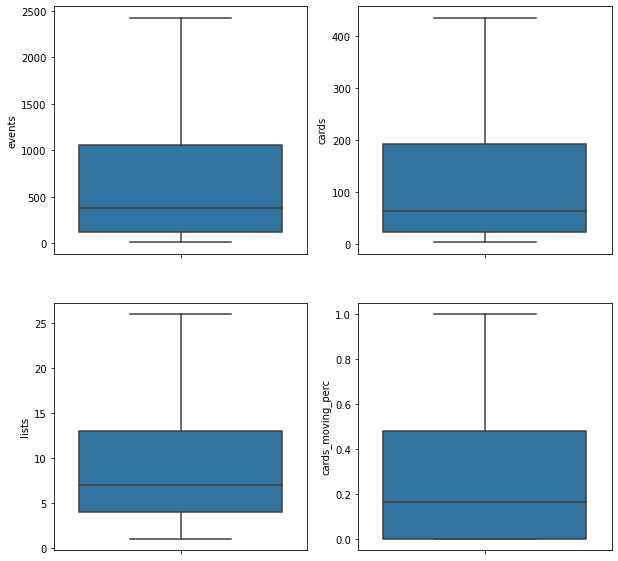

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

axf = ax.flatten()
for i, at in enumerate(['events', 'cards', 'lists', 'cards_moving_perc']):
    sns.boxplot(y=at, data=result_f, showfliers=False, ax=axf[i])


In [8]:
result_f[["events", "cards", "lists", "cards_moving_perc", "cards_closed_perc"]].describe()

,events,cards,lists,cards_moving_perc,cards_closed_perc
count,488.000000,488.000000,488.000000,488.000000,488.000000
mean,1560.909836,215.127049,12.633197,0.271170,0.124358
std,6086.940249,743.618825,35.351603,0.291105,0.188189
min,11.000000,4.000000,1.000000,0.000000,0.000000
25%,118.500000,24.000000,4.000000,0.000000,0.000000
50%,377.000000,63.500000,7.000000,0.164966,0.042471
75%,1059.500000,192.250000,13.000000,0.479663,0.166667
max,103250.000000,10809.000000,686.000000,1.000000,0.928315


Let's filter only those that have had a minimum use. We determine that based on the board lifetime and the number of events

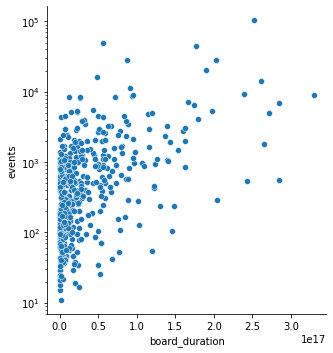

In [9]:
g = sns.relplot(x='board_duration', y='events', data=result_f)
g.set(yscale="log")

In [10]:
selected = result_f[(result_f['events'] > 2000)  & ((result_f['ends'] - result_f['start']) > pd.Timedelta('12W'))]
selected.shape

(63, 32)

In [11]:
selected["name"].values

array(['Session Board.csv', 'Navy Seals.csv',
       'Subnautica Development.csv', 'DevDocs Documentation.csv',
       'Rogue Lineage.csv', 'Tatakai.csv', 'a.csv', 'lovedrop lake.csv',
       'treachery.online.csv', 'Teardown Tracker.csv',
       '[MG] Mediziner.csv', 'Deisim Development.csv',
       'Project Aincrad.csv', 'Skin Approval.csv', 'Last Pirates .csv',
       'Resurgence.csv', "Rikudou's Addons.csv", 'VH3.csv',
       'Wayward Todo.csv', 'HKSTP TalentConnect.csv',
       'An Uprising Trello.csv', 'PnP.csv', '近期待辦事項.csv', 'Lishting.csv',
       'Software Inc..csv', 'Aeronautica (Discontinued Trello).csv',
       'GTA Colors.csv', 'RPG Resources.csv', 'VulgarLang.csv',
       '(Antigo)PokeZWorld.csv', 'Oeagag Trello.csv', 'Animes.csv',
       'SoulShatters.csv', 'Studiocart Roadmap.csv', 'Content Team.csv',
       'Inbox.csv', 'Territory Helper.csv', '#BergShelterPets.csv',
       'Svnnydraw.csv', 'Divine.csv', 'R2CK.csv', 'Supa VAM.csv',
       'Elation.csv', 'SEEL 2021-II (

In [12]:
# Use this for additional filters
#sel = selected[selected["cards_moving_perc"] >0.6]
sel = selected
sel.shape

(63, 32)

In [619]:
all = []
for file in sel["name"]:
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    info = bomi.log_info(df)
    bomi.enrich_log(df)
    redesigns = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=4)

    info = {
        **info,
        **bomi.redesign_metrics(df, redesigns)
    }

    if "data.list.id" in df.columns:
        lists = bomi.list_evolution(df)
        connected = bomi.connected_lists(df)

        info = {
            **info,
            **bomi.list_evolution_metrics(df, lists),
            **bomi.connected_metrics(df, connected),
            **bomi.move_metrics(df),
            **bomi.act_metrics(df)
        }    

    info['name'] = file
    all.append(info)

detailed = pd.DataFrame.from_records(pd.json_normalize(all))

detailed.head(5)

,events,attribs,cards,lists,list_first_create,list_last_create,list_renamed,list_closed,start,ends,board_duration,first_event_type,members,card_members_assigned,card_checklists,card_movement,card_closed,card_deleted,card_due,cards_moving_perc,cards_checklist_perc,cards_assigned_perc,cards_closed_perc,redesign_distance_meandays,list_duration,list_renames_mean,list_num_components,list_connected_size_mean,list_num_components_move,list_with_move_perc,moves_per_moving_card,card_act_perc,act_per_act_card,name,events_per_member.count,events_per_member.mean,events_per_member.std,events_per_member.min,events_per_member.25%,events_per_member.50%,events_per_member.75%,events_per_member.max,redesigns.count,redesigns.mean,redesigns.std,redesigns.min,redesigns.25%,redesigns.50%,redesigns.75%,redesigns.max,redesign_distance.count,redesign_distance.mean,redesign_distance.std,redesign_distance.min,redesign_distance.25%,redesign_distance.50%,redesign_distance.75%,redesign_distance.max,list_duration_perc.count,list_duration_perc.mean,list_duration_perc.std,list_duration_perc.min,list_duration_perc.25%,list_duration_perc.50%,list_duration_perc.75%,list_duration_perc.max,act_per_list.count,act_per_list.mean,act_per_list.std,act_per_list.min,act_per_list.25%,act_per_list.50%,act_per_list.75%,act_per_list.max,move_per_list_with_move.count,move_per_list_with_move.mean,move_per_list_with_move.std,move_per_list_with_move.min,move_per_list_with_move.25%,move_per_list_with_move.50%,move_per_list_with_move.75%,move_per_list_with_move.max
0,48905,103,8847,686,2020-05-14 00:23:03.192,2022-03-02 05:01:58.050,213,856,2020-05-13 23:55:03.489,2022-03-02 12:14:56.338,657 days 12:19:52.849000,createBoard,193,63,10,10026,114,89,11,0.778456,0.000904,0.004973,0.012886,1.521619,21 days 19:12:40.223555393,1.297376,91,7.538462,2,0.870262,1.455786,0.826156,3.720482,Session Board.csv,193.0,253.393782,616.934112,1.0,12.00,43.0,203.00,4939.0,121.0,355.504132,540.158312,12.0,133.00,215.0,357.00,4753.0,121,1 days 12:31:07.854082644,1 days 14:01:33.997357432,0 days 00:00:00,0 days 06:31:43.710000,0 days 22:44:45.461000,2 days 09:59:16.066000,7 days 22:42:02.378000,686.0,0.033156,0.098522,6.851004e-08,0.005171,0.009038,0.012898,0.999987,634.0,42.607256,292.444033,1.0,16.0,21.0,29.00,6797.0,597.0,33.587940,244.950689,1.0,11.00,12.0,12.00,5077.0
1,45447,178,6771,194,2013-09-27 22:45:46.879,2019-03-31 04:17:53.538,219,191,2013-09-27 22:35:21.698,2019-05-03 12:26:09.074,2043 days 13:50:47.376000,createBoard,38,3276,588,12729,1128,35,337,0.896618,0.062325,0.347216,0.163787,25.431216,111 days 15:09:46.020994382,2.213483,30,6.466667,1,0.850515,2.096689,0.950820,4.260174,Subnautica Development.csv,38.0,1195.973684,2086.102567,1.0,67.75,449.0,1388.75,9059.0,57.0,144.929825,123.500558,10.0,61.00,120.0,194.00,701.0,57,25 days 10:20:57.024736842,47 days 03:30:07.076459114,1 days 11:48:37.907000,5 days 04:30:58.797000,7 days 19:20:28.824000,19 days 16:40:47.979000,223 days 03:24:21.631000,178.0,0.054626,0.132418,8.408799e-08,0.003708,0.012366,0.053827,0.795580,119.0,122.773109,271.093624,1.0,26.0,68.0,119.50,2292.0,165.0,154.290909,254.419330,1.0,47.00,92.0,163.00,2080.0
2,796,53,178,7,2020-04-27 03:53:06.195,2021-02-02 06:30:34.907,0,0,2020-04-27 03:51:51.140,2021-12-02 06:31:56.205,584 days 02:40:05.065000,createBoard,1,0,2,216,13,2,1,0.679775,0.011236,0.000000,0.073034,0.000000,500 days 12:15:55.255571432,1.000000,3,2.333333,2,0.857143,1.785124,0.865169,2.363636,Kruiz Control.csv,1.0,796.000000,NaN,796.0,796.00,796.0,796.00,796.0,1.0,107.000000,NaN,107.0,107.00,107.0,107.00,107.0,1,0 days 00:00:00,NaT,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,7.0,0.856876,0.193060,5.187385e-01,0.739796,0.999808,0.999998,0.999999,6.0,60.333333,45.447405,2.0,35.5,51.0,88.25,127.0,6.0,72.000000,61.815856,8.0,15.75,71.5,116.75,152.0
3,3215,90,406,34,2017-09-13 17:58:10.902,2021-11-05 21:46:56.645,66,29,2017-09-13 17:56:11.179,2022-02-12 16:38:40.952,1612 days 22:42:29.7

In [624]:
#selected_columns = ["events", "cards", "lists", "list_renamed", "list_closed", "cards_moving_perc", "cards_closed_perc", "list_renames_mean", "list_connected", "list_connected_size_median", "moves_per_moving_card", "card_act_perc", "act_per_act_card", "redesigns.count", "redesigns.mean", "redesign_distance_meandays", "list_duration_perc.mean", "act_per_list.mean", "move_per_list_with_move.mean", "list_with_move_perc"]
selected_columns = ["name", "cards_act_perc", "cards_moving_perc", "cards_closed_perc", "moves_per_moving_card",  "act_per_act_card", "list_num_components", 'list_connected_size_mean', 'list_num_components_move', "act_per_list.mean", "move_per_list_with_move.mean", "list_with_move_perc", "list_duration_perc.mean", "redesigns.count", "redesigns.mean", "redesign_distance_meandays", "list_renames_mean"]
data_cluster = detailed.loc[:, selected_columns].fillna(0)





# Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, MeanShift, AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, calinski_harabasz_score, silhouette_score

clusters = [KMeans(n_clusters=i, random_state=0).fit(data_cluster) for i in range(2,10)]
pd.DataFrame([(i, silhouette_score(data_cluster, c.labels_), calinski_harabasz_score(data_cluster, c.labels_)) for i,c in enumerate(clusters, 2)], columns=['ID','SILHOUETTE', 'CALINSKI'])


In [489]:
def muestra_agrupacion(puntos, clusters):
    puntos_2D = pd.DataFrame(PCA(n_components=2).fit_transform(puntos), columns=['x', 'y'])
    puntos_2D['grupo'] = clusters
    numero_grupos = len(pd.Series(clusters).unique())
    
    plt.figure(figsize=(5,5))
    paleta = sns.color_palette("bright", numero_grupos)
    sns.scatterplot(x='x', y='y', hue='grupo', data=puntos_2D, palette=paleta)
    plt.xticks([], [])
    plt.xlabel('')
    plt.yticks([], [])
    plt.ylabel('')
    plt.show()



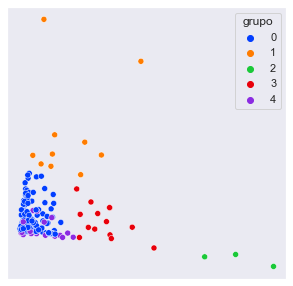

In [537]:
chosen_kmeans = clusters[3]
muestra_agrupacion(data_cluster, chosen_kmeans.labels_)

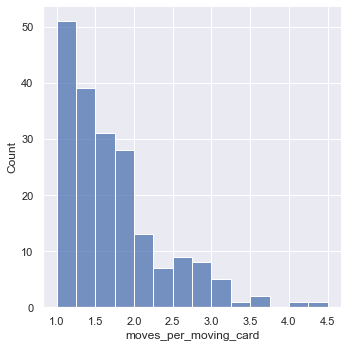

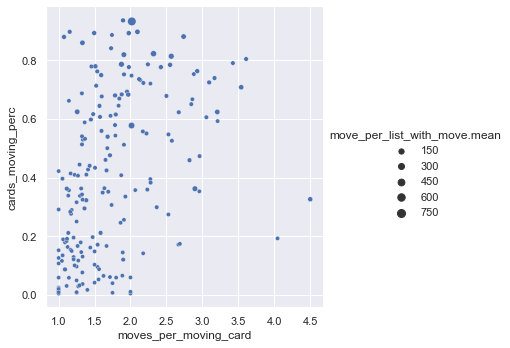

In [533]:
sns.displot(x='moves_per_moving_card', data=detailed)
sns.relplot(x='moves_per_moving_card', y='cards_moving_perc', size='move_per_list_with_move.mean', data=detailed)

In [540]:
detailed.groupby(clusters[3].labels_)['name'].unique().apply(lambda x: print(x))

['speleo.se.csv' 'Navy Seals.csv' 'Subnautica Development.csv'
 'Restoration.csv' 'Kruiz Control.csv' 'Tatakai.csv' '托福口语.csv' 'a.csv'
 'ÁgilesNXB.csv' 'Goner Development.csv' 'LuxCoreRender.csv'
 'bestraroget.csv' 'boyprivunot.csv' 'Cosmoteer Roadmap.csv' 'Gota.io.csv'
 '00. Central Repository.csv' 'Ziggurat House.csv' 'thingbullrashe.csv'
 'treachery.online.csv' 'Trelolo.csv' 'Joel.FUN.csv' 'MORT.csv'
 'Deisim Development.csv' 'Planejamento Estratégico.csv' 'Morocco.csv'
 '1 D.csv' 'GENERAL TASKLIST.csv' 'Hawaii Vacay Jul 2021.csv'
 'To do list.csv' 'ovnatistxper.csv' 'Anime Rifts.csv' 'UNEP@50.csv'
 'UNDP Energy.csv' 'Project Aincrad.csv'
 '#FIMC 2022 Forum International de la Météo et du Climat.csv'
 'On-boarding Apinya SHE 2091.csv' 'R5RELOADED.csv' 'Ревитоника.csv'
 'Resurgence.csv' 'GTFO_VR.csv' 'moanadowntis.csv' "Rikudou's Addons.csv"
 'VH3.csv' 'TrelloExport.csv' 'communicatieplan.csv' 'Katiau!.csv'
 'Unitale.csv' 'Documents for Review Workflow.csv'
 'COMMISSION BY HINO H

0    None
1    None
2    None
3    None
4    None
Name: name, dtype: object

In [538]:
[detailed.groupby(ck.labels_)['name'].count() for ck in clusters]

[0    213
 1     20
 Name: name, dtype: int64,
 0    207
 1     22
 2      4
 Name: name, dtype: int64,
 0     20
 1      4
 2     18
 3    191
 Name: name, dtype: int64,
 0    184
 1     10
 2      3
 3     14
 4     22
 Name: name, dtype: int64,
 0      5
 1     33
 2     10
 3      3
 4    166
 5     16
 Name: name, dtype: int64,
 0     32
 1     29
 2      3
 3    151
 4      1
 5     16
 6      1
 Name: name, dtype: int64,
 0     39
 1    124
 2      3
 3     16
 4      1
 5     18
 6      1
 7     31
 Name: name, dtype: int64,
 0    124
 1     13
 2     13
 3      3
 4     39
 5      1
 6      1
 7      4
 8     35
 Name: name, dtype: int64]

In [543]:
data_cluster.groupby(chosen_kmeans.labels_).agg(['mean', 'std', 'min', 'max']).transpose()

0            1            2  \
cards_moving_perc            mean    0.330350     0.729139     0.002455   
                             std     0.291036     0.116266     0.004253   
                             min     0.000000     0.539157     0.000000   
                             max     0.935484     0.931894     0.007366   
cards_closed_perc            mean    0.157187     0.476025     0.007980   
                             std     0.194243     0.299926     0.013822   
                             min     0.000000     0.014493     0.000000   
                             max     0.852349     0.902158     0.023941   
list_renames_mean            mean    1.722631     1.934307     2.333333   
                             std     0.770442     0.597507     1.154701   
                             min     0.000000     1.166667     1.000000   
                             max     6.083333     3.250000     3.000000   
list_connected               mean    6.559783     3.400000     3.333333   
                             std     7.670589     2.590581     2.309401   
                             min     1.000000     1.000000     2.000000   
                             max    58.000000    10.000000     6.000000   
list_connected_size_median   mean    2.437500     3.800000     1.666667   
                             std     3.217975     4.137901     1.154701   
                             min     1.000000     1.000000     1.000000   
                             max    20.000000    14.000000     3.000000   
moves_per_moving_card        mean    1.450842     1.842590     0.416667   
                             std     0.891242     0.645395     0.721688   
                             min     0.000000     1.258481     0.000000   
                             max     4.502439     3.541322     1.250000   
card_act_perc                mean    0.714623     0.868352     0.855220   
                             std     0.275638     0.078962     0.209186   
                             min     0.034188     0.797872     0.615385   
                             max     1.000000     1.000000     1.000000   
act_per_act_card             mean    6.244622     7.878266   320.062661   
                             std     4.516268     6.002970   313.251808   
                             min     1.000000     2.666667    20.937984   
                             max    28.863636    18.798535   645.750000   
redesigns.count              mean    3.375000     2.900000     1.000000   
                             std     6.745622     0.875595     1.000000   
                             min     0.000000     1.000000     0.000000   
                             max    63.000000     4.000000     2.000000   
redesigns.mean               mean   69.335789    67.450000    71.333333   
                             std    57.566594    34.768551    76.428616   
                             min     0.000000    26.000000     0.000000   
                             max   213.250000   122.666667   152.000000   
redesign_distance_meandays   mean   50.726235   513.269148    17.213215   
                             std    72.840523   259.721106    29.814164   
                             min     0.000000   294.298104     0.000000   
                             max   316.657562  1155.262721    51.639646   
list_duration_perc.mean      mean    0.672144     0.482544     0.779173   
                             std     0.264211     0.147993     0.191254   
                             min     0.000000     0.153437     0.666579   
                             max     1.000000     0.738250     1.000000   
act_per_list.mean            mean   65.677864   232.944862  1331.444444   
                             std    60.958218   181.676522   239.270438   
                             min     0.000000    39.600000  1127.500000   
                             max   249.444444   577.428571  1594.833333   
move_per_list_with_move.mean mean   22.897754   187.500317     0.6666

# List analysis

In [15]:
all = []
for file in sel["name"]:
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    #info = bomi.log_info(df)
    bomi.enrich_log(df)
    redesigns = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=4)
    
    info = bomi.static_metrics(df, redesigns.head(20), event_threshold=20)

    info['name'] = file
    all.append(info.reset_index())

detailed = pd.concat(all).reset_index(drop=True)

detailed.head(5)

ZeroDivisionError: division by zero

In [ ]:
detailed.to_csv("detailed.csv")

In [30]:
df = pd.read_csv(f"CSVs-completos/Rikudou's Addons.csv", index_col=0, parse_dates=["date"], low_memory=False)
bomi.enrich_log(df)
begin_end_redesign = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=5)
filtered_result = bomi.list_evolution(df, filter_short_lists=pd.Timedelta('30m'))
cl = bomi.connected_lists(df, use='comb', threshold=0)


In [60]:
filtered_result.set_index(pd.IntervalIndex.from_arrays(filtered_result["begin_date"], filtered_result["last_date"])).loc[pd.Timestamp(year=2021, month=1, day=1, tz="UTC")]

,begin_date,last_date,last_name,data.list.name
"(2019-09-02 01:24:13.925000, 2022-02-24 11:23:42.117000]",2019-09-02 01:24:13.925000+00:00,2022-02-24 11:23:42.117000+00:00,Issues that won't be fixed,[Issues that won't be fixed]
"(2019-09-30 18:49:00.328000, 2022-02-24 11:23:42.117000]",2019-09-30 18:49:00.328000+00:00,2022-02-24 11:23:42.117000+00:00,Fixed Issues,[Fixed Issues]
"(2019-09-30 18:51:14.243000, 2022-02-24 11:23:42.117000]",2019-09-30 18:51:14.243000+00:00,2022-02-24 11:23:42.117000+00:00,ACR To-Do list,"[ACR To-Do list, Tensor ACR To-Do list, Tensor..."
"(2019-11-11 06:50:45.317000, 2022-02-24 11:23:42.117000]",2019-11-11 06:50:45.317000+00:00,2022-02-24 11:23:42.117000+00:00,TensorBinds To-Do list,"[TensorBinds To-Do list, TensorBinds]"
"(2020-01-10 01:47:37.506000, 2022-02-24 11:23:42.117000]",2020-01-10 01:47:37.506000+00:00,2022-02-24 11:23:42.117000+00:00,Tensor Reactions To-Do List,[Tensor Reactions To-Do List]
"(2020-01-29 04:16:11.477000, 2022-02-24 11:23:42.117000]",2020-01-29 04:16:11.477000+00:00,2022-02-24 11:23:42.117000+00:00,Argus To-Do list,"[Argus To-Do list, Argus Stuff]"
"(2020-03-05 00:33:43.617000, 2022-02-24 11:23:42.117000]",2020-03-05 00:33:43.617000+00:00,2022-02-24 11:23:42.117000+00:00,Being worked on,[Being worked on]
"(2020-12-02 05:09:57.519000, 2022-02-24 11:23:42.117000]",2020-12-02 05:09:57.519000+00:00,2022-02-24 11:23:42.117000+00:00,Being Implemented,[Being Implemented]


In [65]:
info = bomi.static_metrics(df, begin_end_redesign)
info["name"] = "asdf"
info.reset_index()

,index,events,list_num_components,list_connected_size_mean,list_connected_size_mean_perc,list_num_components_move,move_per_list_with_move,list_with_move_perc,cards_moving_perc,moves_per_moving_card,act_per_list,cards_act_perc,act_per_act_card,cards_closed_perc,name
0,"(2020-03-07 12:36:50.251000, 2022-02-24 11:23:...",2122,1,8.0,1.000000,1,95.000000,1.0,0.720721,1.583333,64.125000,0.780781,5.026923,0.513514,asdf
1,"(2019-11-11 06:55:04.815000, 2020-03-05 00:33:...",420,4,2.5,0.250000,1,10.857143,0.7,0.493506,1.000000,13.714286,0.818182,4.587302,0.116883,asdf
2,"(2019-10-01 00:55:27.242000, 2019-11-11 06:50:...",73,4,1.5,0.250000,1,4.666667,0.5,0.388889,1.000000,5.000000,0.555556,4.000000,0.500000,asdf
3,"(2019-09-02 23:17:04.228000, 2019-09-30 18:49:...",24,6,1.0,0.166667,0,NaN,0.0,0.000000,NaN,3.250000,0.818182,1.444444,0.000000,asdf


In [ ]:
selected_columns = [ "list_duration_perc.mean", "redesigns.count", "redesigns.mean", "redesign_distance_meandays", "list_renames_mean"]


In [39]:
bomi.full_metrics(df, begin_end_redesign, filtered_result, cl)

AttributeError: module 'bomi' has no attribute 'full_metrics'

In [16]:
bomi.list_renames(df)

data.list.id
5d6b0d902ab1ec03b26e0f6a     [Issues Being worked on, Issues being worked on]
5d6b0da6dea88b52f54bb16d                                     [Trash, Reports]
5d6b0daa3ddbde1cc886132d                                   [Feature Requests]
5d6b10d5fe46dd5a5eca1f8f    [Job Features for TCRs if I make them, VOTE: N...
5d6c6f3dd96a143f17ae3bc7                         [Issues that won't be fixed]
5d924e1ce7903112fa51fd9f                                       [Fixed Issues]
5d924e4cc46bc43d6d3739c1    [TensorRequiem To-Do list, TensorReq To-Do lis...
5d924ea2bebfca3be3abf18e    [ACR To-Do list, Tensor ACR To-Do list, Tensor...
5dc904c5e497973ff4d35788                [TensorBinds To-Do list, TensorBinds]
5e17d7b961c0760f531ebff6                        [Tensor Reactions To-Do List]
5e31070bc74e038e0d04be47                      [Argus To-Do list, Argus Stuff]
5e6048e797842c7e7f7313bb                                    [Being worked on]
5e62dc41a042f37ecf999877                           

In [17]:
df['c'].value_counts()

card_act       1698
card_move       437
card_create     348
card_close      193
card_delete      10
Name: c, dtype: int64

In [28]:
begin_end_redesign = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=5)
begin_end_redesign

,min,max,count,count_l_events
3,2020-03-05 00:33:43.617000+00:00,2020-03-07 12:36:50.251000+00:00,49,6
8,2019-11-11 06:50:45.317000+00:00,2019-11-11 06:55:04.815000+00:00,14,7
10,2019-09-30 18:49:00.328000+00:00,2019-10-01 00:55:27.242000+00:00,17,7
12,2019-08-31 22:31:07.401000+00:00,2019-09-02 23:17:04.228000+00:00,50,9


In [19]:
begin_end_redesign['min'] - begin_end_redesign['max'].shift(-1, fill_value=df["date"].min())

1    269 days 16:33:07.268000
3     15 days 23:21:08.574000
4     19 days 00:18:02.187000
6     19 days 02:27:54.450000
7     59 days 18:47:02.712000
8     41 days 05:55:18.075000
10    27 days 19:31:56.100000
12            0 days 00:00:00
dtype: timedelta64[ns]

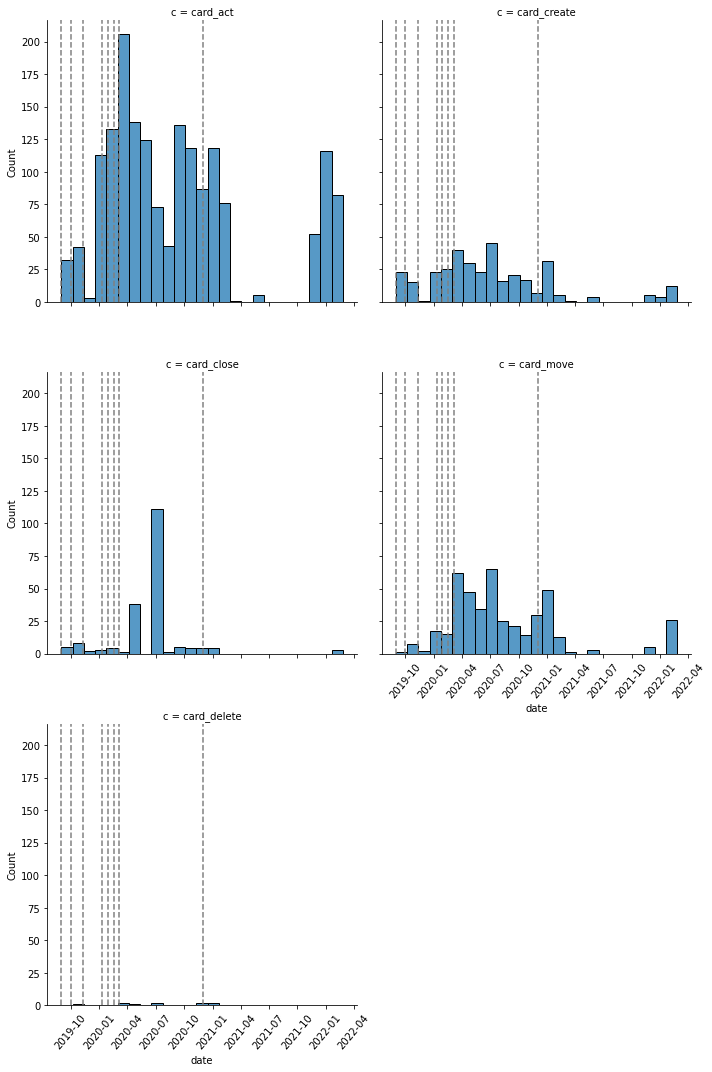

In [20]:
import seaborn as sns

ax = sns.displot(df, x="date", col="c", col_wrap=2)
ax.set_xticklabels(rotation=50)

for f in begin_end_redesign["min"].values:
    ax.refline(x=f)

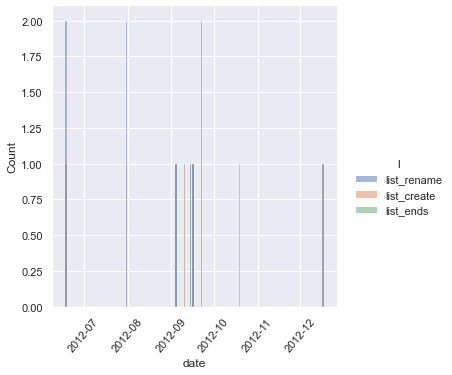

In [649]:
chart = sns.displot(df, hue="l", x="date", binwidth=1)
chart.set_xticklabels(rotation=50)

In [26]:
filtered_result = bomi.list_evolution(df, filter_short_lists=pd.Timedelta('30m'))
filtered_result.head(50)


,begin_date,last_date,last_name,data.list.name
data.list.id,,,,
5d6b0d902ab1ec03b26e0f6a,2019-09-01 00:15:12.620000+00:00,2019-09-30 18:52:54.007000+00:00,Issues Being worked on,"[Issues Being worked on, Issues being worked on]"
5d6b10d5fe46dd5a5eca1f8f,2019-09-01 00:29:09.076000+00:00,2019-10-30 04:06:13.171000+00:00,Job Features for TCRs if I make them,"[Job Features for TCRs if I make them, VOTE: N..."
5d924e4cc46bc43d6d3739c1,2019-09-30 18:49:48.692000+00:00,2020-01-10 01:42:07.527000+00:00,TensorRequiem To-Do list,"[TensorRequiem To-Do list, TensorReq To-Do lis..."
5d6b0daa3ddbde1cc886132d,2019-09-01 00:15:38.357000+00:00,2020-01-10 01:47:57.972000+00:00,Feature Requests,[Feature Requests]
5d6b0da6dea88b52f54bb16d,2019-09-01 00:15:34.593000+00:00,2020-02-17 10:22:31.208000+00:00,Trash,"[Trash, Reports]"
5d6c6f3dd96a143f17ae3bc7,2019-09-02 01:24:13.925000+00:00,2022-02-24 11:23:42.117000+00:00,Issues that won't be fixed,[Issues that won't be fixed]
5d924e1ce7903112fa51fd9f,2019-09-30 18:49:00.328000+00:00,2022-02-24 11:23:42.117000+00:00,Fixed Issues,[Fixed Issues]
5d924ea2bebfca3be3abf18e,2019-09-30 18:51:14.243000+00:00,2022-02-24 11:23:42.117000+00:00,ACR To-Do list,"[ACR To-Do list, Tensor ACR To-Do list, Tensor..."
5dc904c5e497973ff4d35788,2019-11-11 06:50:45.317000+00:00,2022-02-24 11:23:42.117000+00:00,TensorBinds To-Do list,"[TensorBinds To-Do list, TensorBinds]"


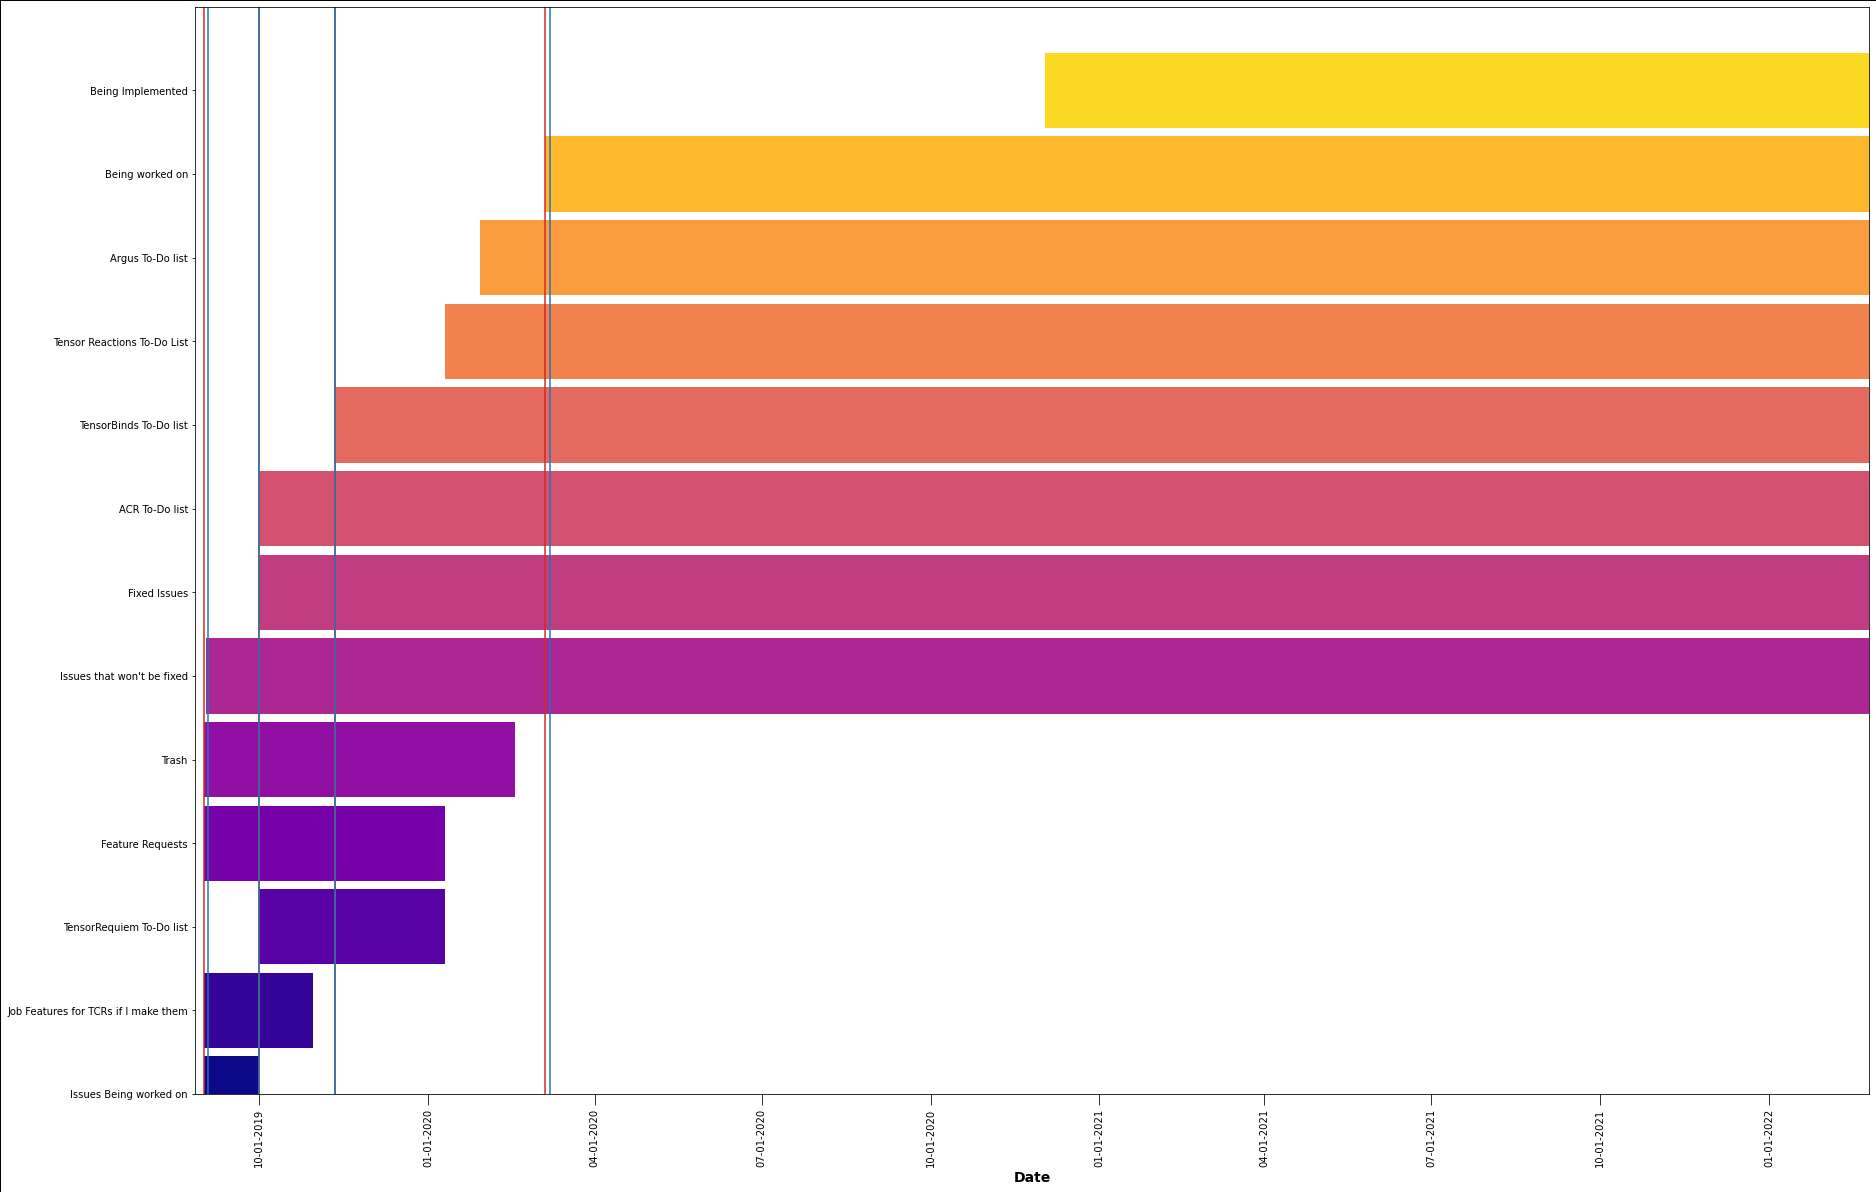

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 20), edgecolor="black", linewidth=1)

bomi.plot_list_diagram(filtered_result, begin_end_redesign, ax)

plt.show()


# Lists analysis

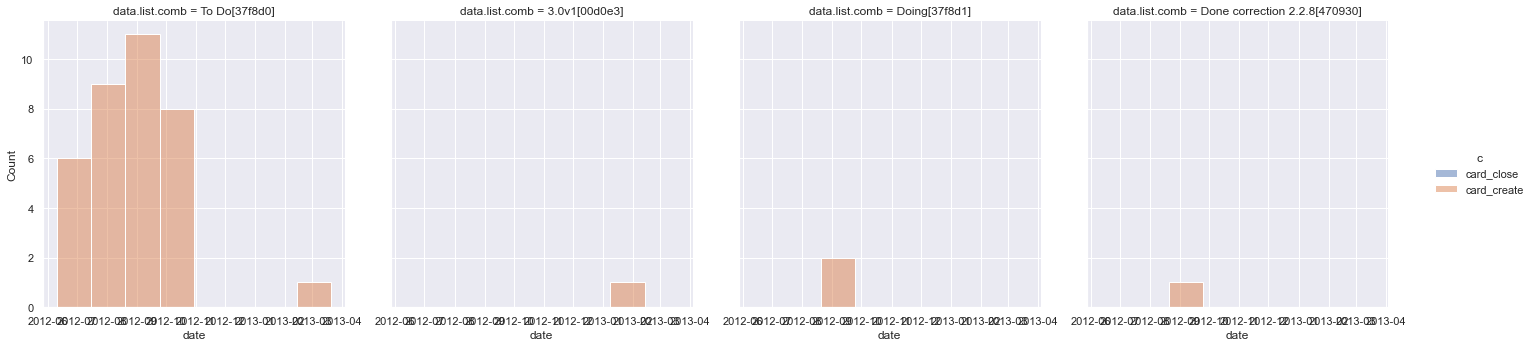

In [652]:
sns.displot(df[df["c"].isin(["card_create", "card_close", "card_delete"])], x="date", hue="c", col="data.list.comb", col_wrap=4, kind='hist')

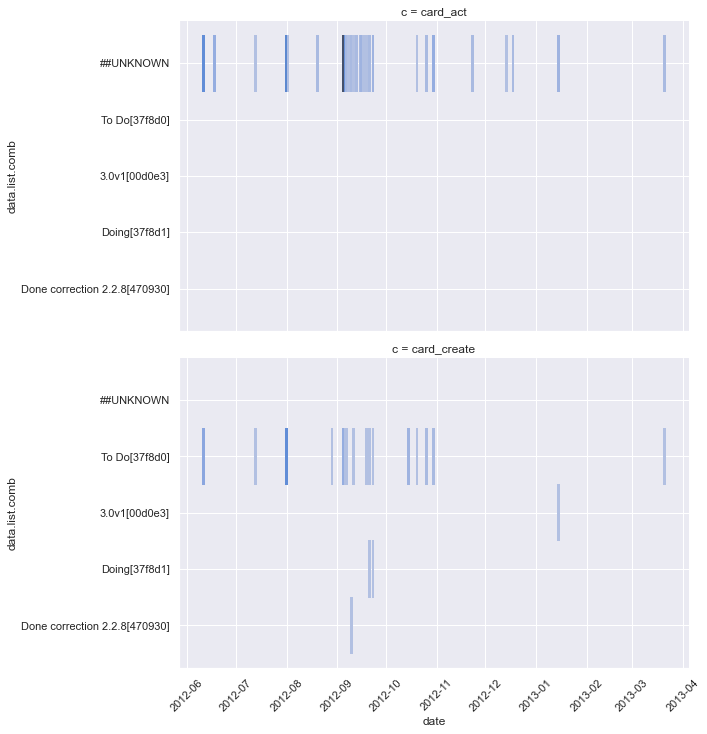

In [702]:
bomi.plot_card_actions(df, aspect=2)

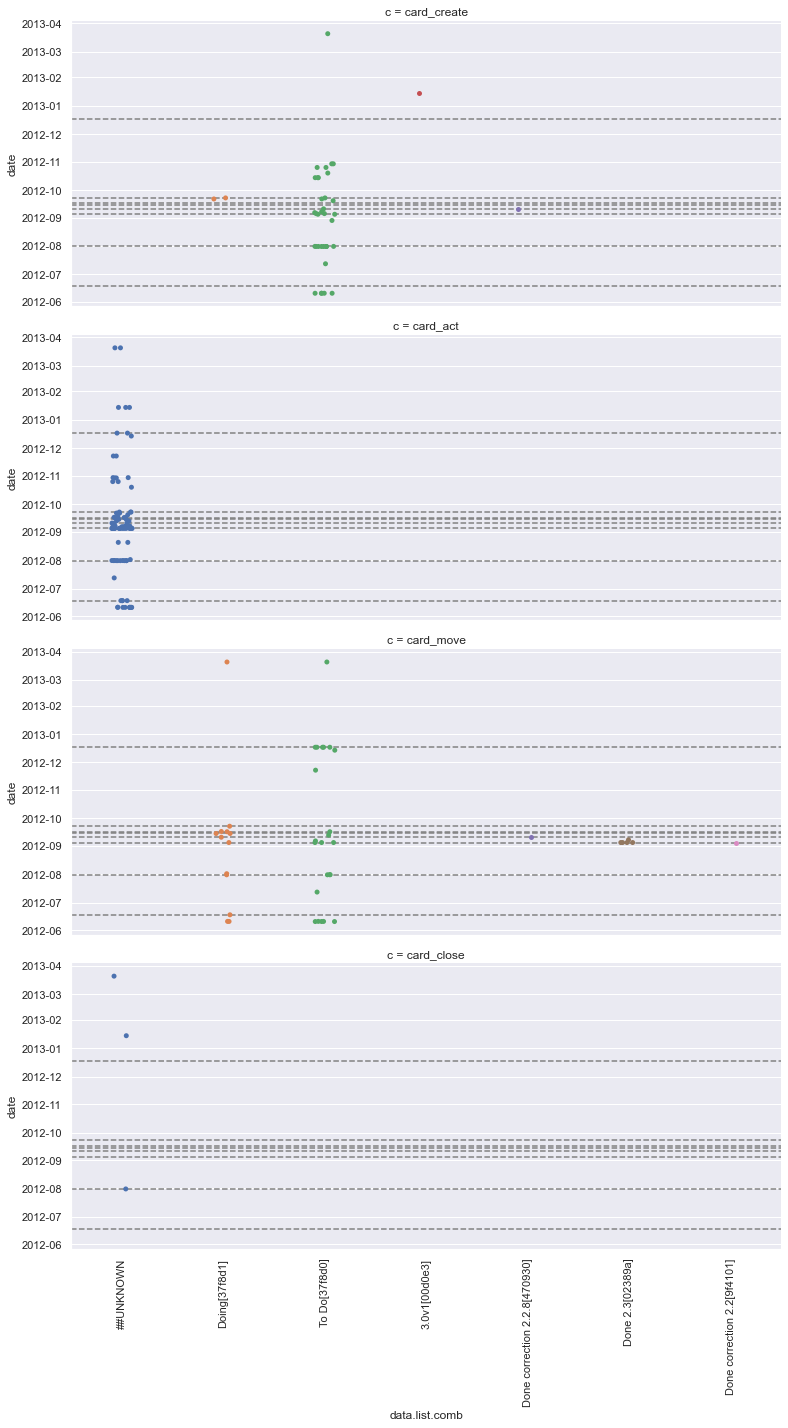

In [698]:
ch = sns.catplot(x="data.list.comb", y="date", row="c", row_order=["card_create", "card_act", "card_move", "card_close"], data=df[df["c"].isin(["card_act", "card_create", "card_move", "card_close"])][["c", "date", "data.list.comb"]].fillna('##UNKNOWN'), aspect=20/9)
ch.set_xticklabels(rotation=90)

for f in begin_end_redesign["min"].values:
    ch.refline(y=f)



# Transitions analysis

In [23]:
bomi.transition_matrix(df, use='id')

data.listAfter.id,Issues that won't be fixed,Fixed Issues,ACR To-Do list,TensorBinds To-Do list,Tensor Reactions To-Do List,Argus To-Do list,Being worked on,Being Implemented
data.listBefore.id,,,,,,,,
Issues that won't be fixed,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN
Fixed Issues,NaN,NaN,1.0,NaN,NaN,NaN,6.0,4.0
TensorRequiem To-Do list,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
ACR To-Do list,2.0,33.0,NaN,NaN,NaN,NaN,59.0,3.0
TensorBinds To-Do list,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN
Tensor Reactions To-Do List,3.0,25.0,1.0,NaN,NaN,NaN,32.0,1.0
Argus To-Do list,NaN,5.0,NaN,NaN,NaN,NaN,3.0,2.0
Being worked on,3.0,179.0,12.0,2.0,10.0,3.0,NaN,8.0
Being Implemented,NaN,16.0,NaN,NaN,NaN,NaN,4.0,NaN


In [683]:
df[df["c"]=="card_act"]

,id,idMemberCreator,appCreator,type,date,data.board.name,data.board.id,data.card.idShort,data.card.name,data.card.id,data.card.closed,data.old.closed,data.card.pos,data.old.pos,data.listAfter.name,data.listAfter.id,data.listBefore.name,data.listBefore.id,data.card.idList,data.old.idList,data.list.name,data.list.id,data.old.desc,data.card.desc,data.old.name,data.list.closed,data.old.prefs.permissionLevel,data.board.prefs.permissionLevel,data.checklist.name,data.checklist.id,data.checkItem.state,data.checkItem.name,data.checkItem.id,data.list.comb,data.listBefore.comb,data.listAfter.comb,l,c
1,5149cddb55df67df5100c2a5,4fc082e52690a4ef39eeb464,NaN,updateCard,2013-03-20 14:55:23.483000+00:00,B71_Script,4fd478584971ae066237f8cf,40.0,test,5149cdbefc0ce75e14004994,NaN,NaN,753663,552959.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
3,5149cdd44c6f379e5200031b,4fc082e52690a4ef39eeb464,NaN,updateCard,2013-03-20 14:55:16.821000+00:00,B71_Script,4fd478584971ae066237f8cf,40.0,test,5149cdbefc0ce75e14004994,NaN,NaN,552959.0625,933887.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
7,50f41e5b84946f556100b4db,4fc082e52690a4ef39eeb464,NaN,updateCard,2013-01-14 15:03:55.908000+00:00,B71_Script,4fd478584971ae066237f8cf,39.0,dsdf,50f41e19f97bb2c45500b2dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<iframe width=""100%"" height=""166"" scrolling=""n...",http://www.youtube.com/watch?v=xrLAoFcS1uw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
8,50f41e4660e7a83149008780,4fc082e52690a4ef39eeb464,NaN,updateCard,2013-01-14 15:03:34.114000+00:00,B71_Script,4fd478584971ae066237f8cf,39.0,dsdf,50f41e19f97bb2c45500b2dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://soundcloud.com/porter-robinson/porter-...,"<iframe width=""100%"" height=""166"" scrolling=""n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
9,50f41e2641d8d0627b003630,4fc082e52690a4ef39eeb464,NaN,updateCard,2013-01-14 15:03:02.394000+00:00,B71_Script,4fd478584971ae066237f8cf,39.0,dsdf,50f41e19f97bb2c45500b2dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://soundcloud.com/porter-robinson/porter-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
11,50cf2d9689b835a46f00d10a,4fc082e52690a4ef39eeb464,NaN,updateCard,2012-12-17 14:35:02.762000+00:00,B71_Script,4fd478584971ae066237f8cf,36.0,intégrer PFspliner (script existant),508967e5e471ad4d11000ad1,NaN,NaN,720895,851967.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
14,50cf2d9189b835a46f00d104,4fc082e52690a4ef39eeb464,NaN,updateCard,2012-12-17 14:34:57.003000+00:00,B71_Script,4fd478584971ae066237f8cf,33.0,intégrer la création mov en make preview (scri...,507ab9300b478dd711001fe0,NaN,NaN,622591,720895.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
20,50caf2ee1156ab5330003552,4fc082e52690a4ef39eeb464,NaN,updateCard,2012-12-14 09:35:42.584000+00:00,B71_Script,4fd478584971ae066237f8cf,13.0,bouton tools,5017c39222108eb82b450256,NaN,NaN,147455.75,393215.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
22,50ae3612f3836dfc0e006b58,4fc082e52690a4ef39eeb464,NaN,updateCard,2012-11-22 14:26:26.209000+00:00,B71_Script,4fd478584971ae066237f8cf,30.0,rajouter de nouveau type d'export,505d97d0add32d041f70023e,NaN,NaN,516095.125,147455.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act
23,50ae360af3836dfc0e006b51,4fc082e52690a4ef39eeb464,NaN,updateCard,2012-11-22 14:26:18.367000+00:00,B71_Script,4fd478584971ae066237f8cf,34.0,Revoir tout le système du bouton next,5081557595efe0a4160033f9,NaN,NaN,442367.25,176127.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card_act


In [682]:
[(t,bomi.card_action_list(df, t, use='comb')) for t in ["card_create", "card_act", "card_move", "card_close"]]

[('card_create',
  data.list.comb
  3.0v1[00d0e3]                    0.025641
  Doing[37f8d1]                    0.051282
  Done correction 2.2.8[470930]    0.025641
  To Do[37f8d0]                    0.897436
  Name: id, dtype: float64),
 ('card_act', Series([], Name: id, dtype: int64)),
 ('card_move',
  data.list.comb
  Doing[37f8d1]                    0.302326
  Done 2.3[02389a]                 0.116279
  Done correction 2.2.8[470930]    0.023256
  Done correction 2.2[9f4101]      0.023256
  To Do[37f8d0]                    0.534884
  Name: id, dtype: float64),
 ('card_close', Series([], Name: id, dtype: int64))]

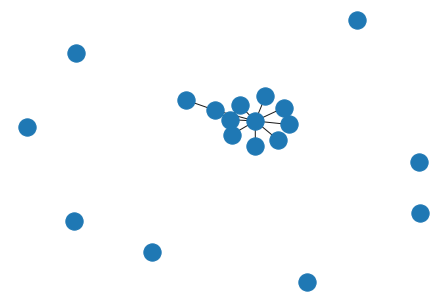

In [656]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(df['data.list.comb'].dropna())
G.add_edges_from(df[['data.listAfter.comb','data.listBefore.comb']].dropna().to_numpy().tolist())

nx.draw(G)

In [25]:
cl = bomi.connected_lists(df, use='comb', threshold=0)
cl

,component,size,count
0,"{Being Implemented[43bdde], Argus To-Do list[0...",13,437
1,{TensorDrift To-Do list[999877]},1,0
2,{Trash[4bb16d]},1,0
3,{Feature Requests[86132d]},1,0
4,{TensorMagnum To-Do list[abf18e]},1,0
5,{Reports[4bb16d]},1,0
6,{TensorReq To-Do list[3739c1]},1,0
7,{TensorBinds[d35788]},1,0
8,{Job Features for TCRs if I make them[ca1f8f]},1,0
9,{Issues Being worked on[6e0f6a]},1,0


<AxesSubplot:xlabel='data.listAfter.name', ylabel='data.listBefore.name'>

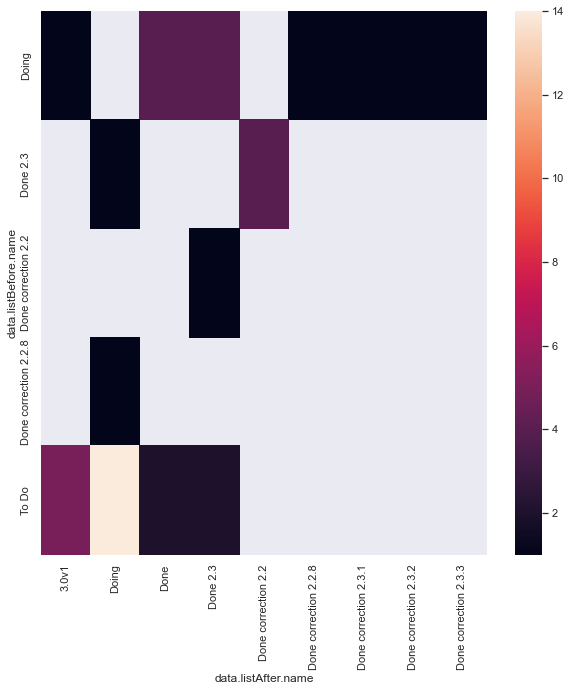

In [658]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.groupby(['data.listBefore.name', 'data.listAfter.name'])['id'].count().unstack(), xticklabels=True, yticklabels=True, ax=ax)

# Conversion to event log

In [659]:
import pm4py

evlog = bomi.to_event_log(df)


In [275]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
xes_exporter.apply(evlog, 'log.xes')

exporting log, completed traces :: 100%|██████████| 1124/1124 [00:00<00:00, 4802.56it/s]


In [660]:
from pm4py.statistics.traces.generic.log import case_statistics
case_statistics.get_variant_statistics(evlog)

[{'variant': 'To Do', 'count': 12},
 {'variant': 'To Do,3.0v1', 'count': 5},
 {'variant': 'To Do,Doing,Done', 'count': 3},
 {'variant': 'To Do,Doing', 'count': 3},
 {'variant': 'To Do,Done 2.3,Done correction 2.2', 'count': 2},
 {'variant': 'To Do,Done', 'count': 2},
 {'variant': 'To Do,Doing,Done,**Closed', 'count': 1},
 {'variant': 'To Do,Doing,Done correction 2.3.2', 'count': 1},
 {'variant': 'To Do,Doing,Done correction 2.3.1', 'count': 1},
 {'variant': 'To Do,Doing,Done correction 2.2.8,Doing', 'count': 1},
 {'variant': 'To Do,Doing,Done 2.3,Done correction 2.2,Done 2.3,Doing,Done 2.3',
  'count': 1},
 {'variant': 'To Do,Doing,Done 2.3,Done correction 2.2', 'count': 1},
 {'variant': 'To Do,Doing,Done 2.3', 'count': 1},
 {'variant': 'To Do,Doing,3.0v1,**Closed', 'count': 1},
 {'variant': 'Done correction 2.2.8', 'count': 1},
 {'variant': 'Doing,Done correction 2.3.3', 'count': 1},
 {'variant': 'Doing', 'count': 1},
 {'variant': '3.0v1,**Closed', 'count': 1}]

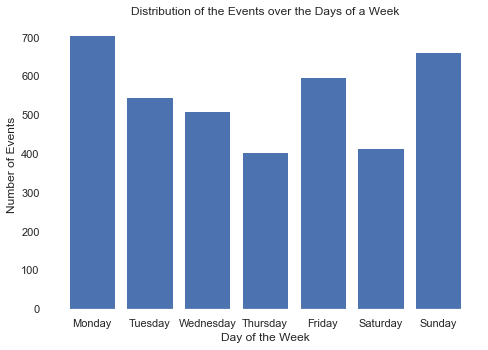

In [277]:
pm4py.view_events_distribution_graph(evlog, distr_type="days_week", format="png")


In [662]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.filtering.log.timestamp import timestamp_filter

filtered_log = variants_filter.filter_log_variants_percentage(evlog, percentage=1)
#filtered_log = timestamp_filter.filter_traces_intersecting(filtered_log, "2014-09-20 00:00:00", "2022-01-18 23:59:59")


In [663]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(filtered_log)

dfg

Counter({('To Do', '3.0v1'): 5,
         ('To Do', 'Doing'): 14,
         ('Doing', 'Done'): 4,
         ('To Do', 'Done 2.3'): 2,
         ('Done 2.3', 'Done correction 2.2'): 4,
         ('To Do', 'Done'): 2,
         ('Done', '**Closed'): 1,
         ('Doing', 'Done correction 2.3.2'): 1,
         ('Doing', 'Done correction 2.3.1'): 1,
         ('Doing', 'Done correction 2.2.8'): 1,
         ('Done correction 2.2.8', 'Doing'): 1,
         ('Doing', 'Done 2.3'): 4,
         ('Done correction 2.2', 'Done 2.3'): 1,
         ('Done 2.3', 'Doing'): 1,
         ('Doing', '3.0v1'): 1,
         ('3.0v1', '**Closed'): 2,
         ('Doing', 'Done correction 2.3.3'): 1})

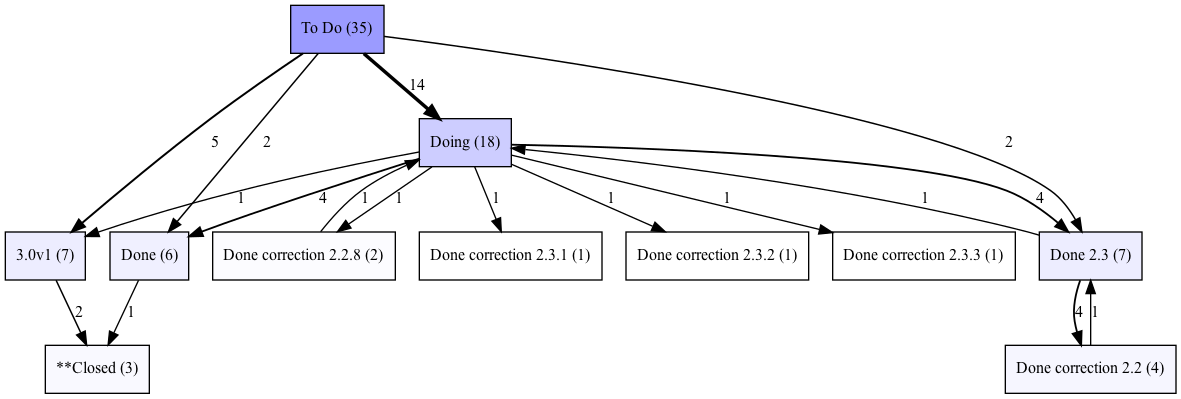

In [664]:
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

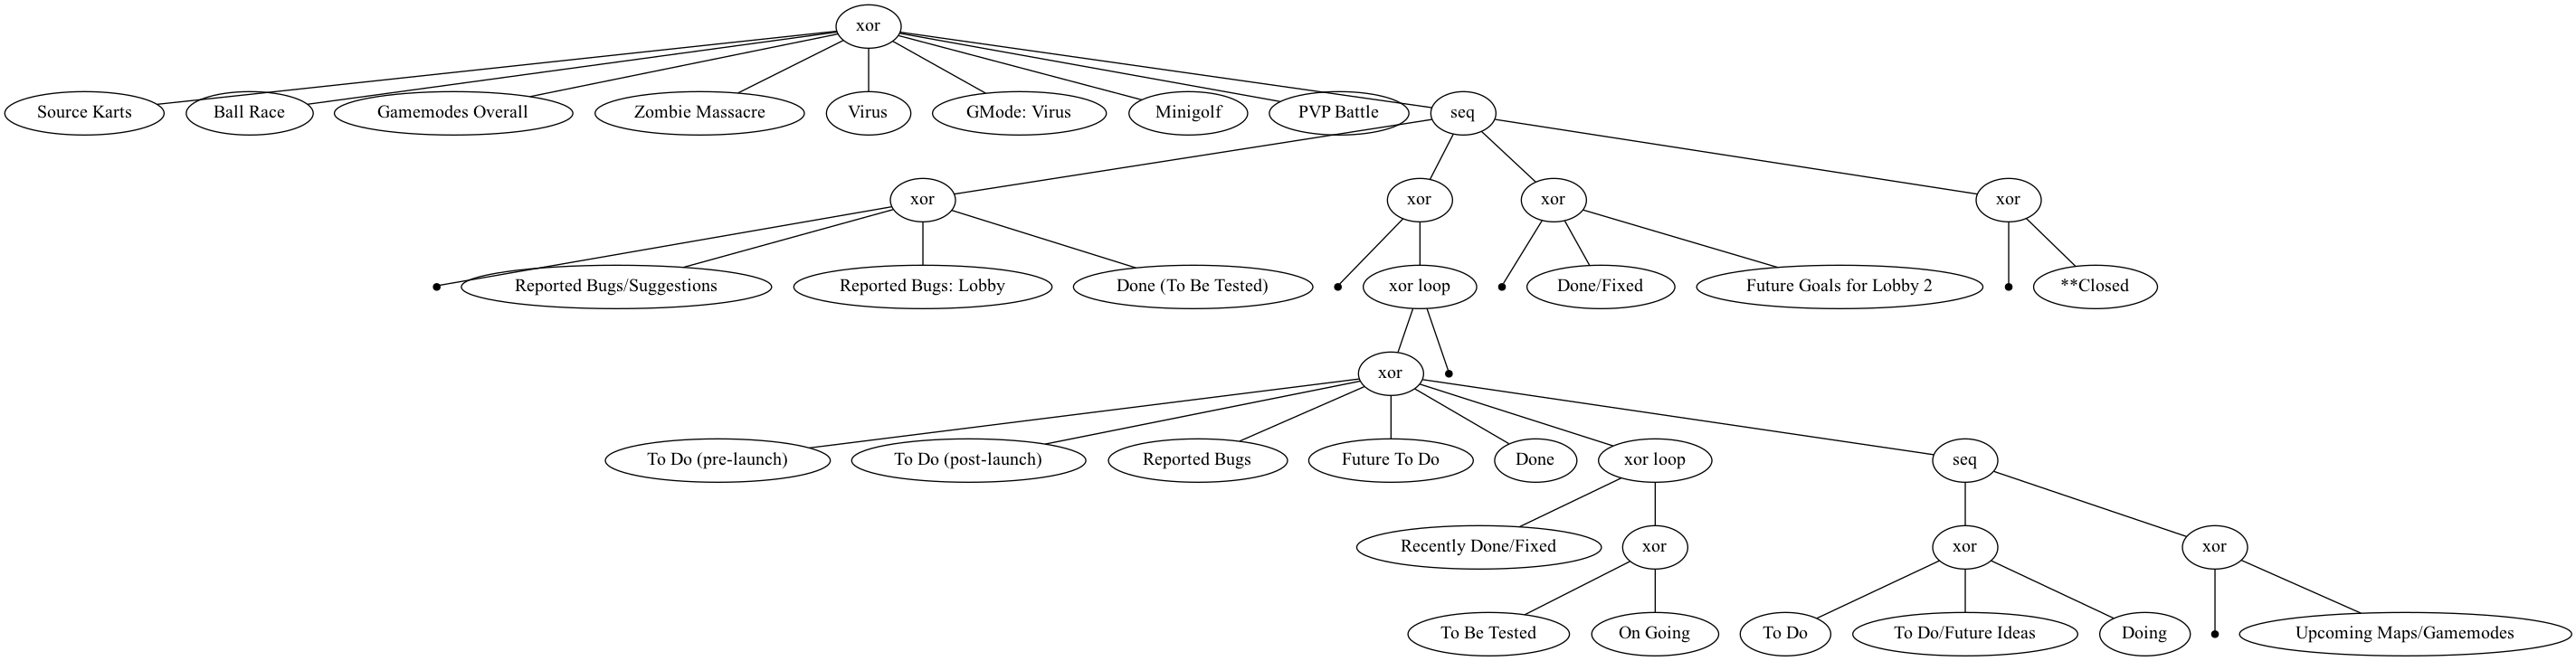

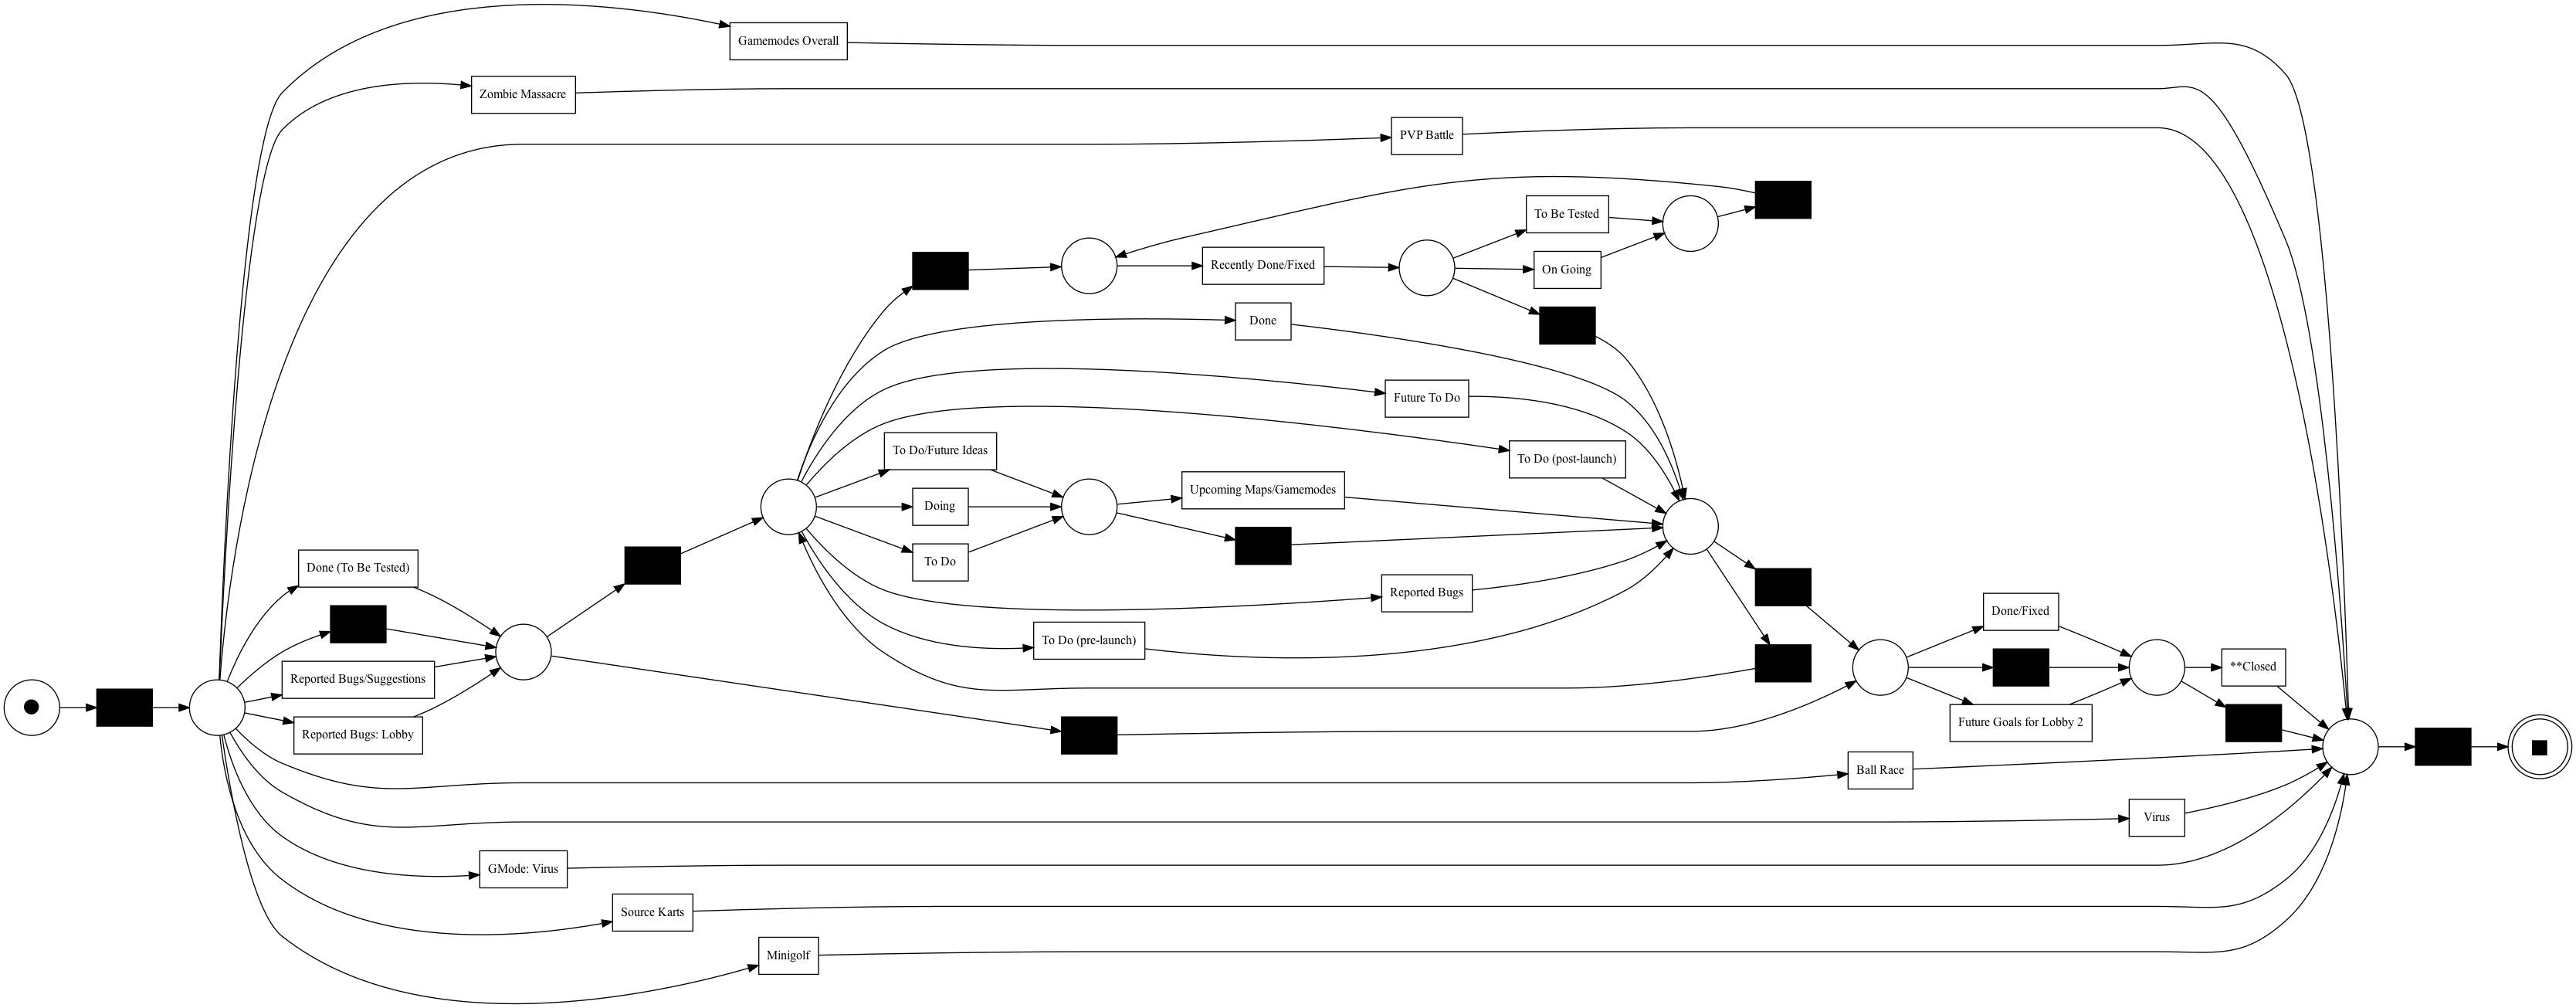

In [281]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# process discovery algorithm
tree = inductive_miner.apply_tree(filtered_log)

# display process tree
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

# display petri net
net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

# Resto

In [ ]:
df['data.list.name'].value_counts()

Stuff                                                     540
Soulshatters Ideas                                        276
Soulshatters Reworks (Community Trello)                   238
UT Fighting Ideas                                         147
UT Fighting Reworks                                       139
Soulshatters Reworks Page 2 (Official Version Reworks)     97
UCD Movesets                                               91
Soulshatters Reworks                                       68
Glitchtale Battle of Souls Ideas                           46
Soulshatters Ideas Page 2                                  38
Glitchtale Battle of Souls Reworks                         28
Soulshatters Self Insert Moveset                           27
GTBOS Ideas Page 2                                         26
Soulshatters Ideas Page 2 (Gamepasses)                     24
Undertale Judgement Day                                    22
GTBOS Ideas: Inverted Traits                               20
DT Trio 

In [ ]:
df['idMemberCreator'].value_counts().describe()

count       24.000000
mean       587.833333
std       2795.804087
min          1.000000
25%          1.000000
50%          2.500000
75%          9.500000
max      13711.000000
Name: idMemberCreator, dtype: float64

In [ ]:
df.groupby('type')['idMemberCreator'].nunique()

type
addAttachmentToCard         2
addChecklistToCard          1
addMemberToBoard            1
addMemberToCard             2
commentCard                 4
copyBoard                   1
copyCard                    2
copyCommentCard             1
createCard                  3
createList                  1
deleteAttachmentFromCard    1
deleteCard                  1
makeAdminOfBoard            2
makeNormalMemberOfBoard     1
moveCardFromBoard           1
moveCardToBoard             1
moveListFromBoard           1
removeMemberFromCard        1
updateBoard                 1
updateCard                  5
updateList                  1
Name: idMemberCreator, dtype: int64

In [ ]:
df['data.card.id'].nunique()

998

In [ ]:
df['type'].value_counts()

commentCard                   21142
updateCard                     3266
updateCheckItemStateOnCard     1364
createCard                      830
addChecklistToCard              287
updateChecklist                 209
updateList                      162
deleteCard                      145
addMemberToCard                 109
addAttachmentToCard              97
removeChecklistFromCard          69
createList                       50
deleteAttachmentFromCard         49
updateBoard                      31
addMemberToBoard                 21
removeMemberFromCard             13
copyCard                         11
convertToCardFromCheckItem       11
createBoard                       1
Name: type, dtype: int64

In [ ]:
comb = df['data.listBefore.name'] + df['data.listAfter.name']

In [ ]:
comb.value_counts()

Current GoalsVersion .28                      33
Current GoalsVersion .44                      32
yname Todoyname Done                          28
Current GoalsVersion .46                      27
Next UpdateVersion .52                        21
                                              ..
Galaxy Devs Development BoardDiscussion        1
DiscussionFuture Goals (Subject to Change)     1
Next UpdateDiscussion                          1
DiscussionFuture Goals                         1
Future GoalsVersion .41                        1
Length: 88, dtype: int64

In [ ]:
df['data.old.name'].count()

5812

In [ ]:
df.groupby('data.card.id')['type'].value_counts()

data.card.id              type           
56002281e63f48b6c2642b0b  createCard         1
56002285c54eb4f654b11859  createCard         1
5600228fe6d280c1ba1c5518  createCard         1
5600229cd8417540b8154382  createCard         1
560022a3a1444f94c2deef74  createCard         1
                                            ..
620943fd2596fe66a8df6ff3  addMemberToCard    1
                          createCard         1
620d48adaf1011873cf57dcd  updateCard         2
                          addMemberToCard    1
                          createCard         1
Name: type, Length: 2632, dtype: int64

In [ ]:
df[df['type']=='createCard'].groupby('data.list.name')['data.card.id'].count()

data.list.name
Backlog                                                                  3
Cache not always purged for campaign when deleting entire campaign       1
Done                                                                    48
Focus                                                                  375
Inbox                                                                   86
Ready for Publishing                                                   111
Started                                                               1052
Testing                                                                356
To Be Published                                                         34
To Do                                                                    8
Name: data.card.id, dtype: int64

In [ ]:
df[df['data.card.id']=='5a6b119f0fdae8c8b2001d4c']

,Unnamed: 0,id,idMemberCreator,appCreator,type,date,data.card.desc,data.card.id,data.card.name,data.card.idShort,...,limits.reactions.uniquePerAction.disableAt,limits.reactions.uniquePerAction.warnAt,data.attachment.id,data.attachment.name,data.attachment.url,data.attachment.previewUrl,data.attachment.previewUrl2x,data.boardSource.id,data.boardSource.prefs.isTemplate,data.boardSource.templateCategory


In [ ]:
min(df['date']), max(df['date'])

('2015-09-21T15:28:44.622Z', '2022-02-17T13:52:12.992Z')